## **<h1>FairPrice Check: Real Estate Price Predictor and Anomaly Detector**

# Business Understanding

## Business Problem

The real estate market is characterized by significant information asymmetry. Buyers and renters often lack the expertise and market visibility needed to determine whether a listed property price is fair relative to similar properties in the same location. At the same time, sellers and agents may unintentionally overprice or underprice properties due to reliance on intuition, incomplete comparable listings, or outdated market information.

These pricing inefficiencies can result in prolonged time on the market, failed negotiations, financial losses, and reduced trust in the housing ecosystem. The problem is especially pronounced in urban housing markets, where property prices vary widely based on location, size, property type, and available amenities, making price fairness difficult to assess for non-expert participants.

Rather than predicting an exact market value, there is a practical need for a **decision-support system**.


## Proposed Solution

This project proposes a **supervised machine learning classification system** that learns pricing patterns from historical real estate data and property features such as:

- Location 
- Property type  
- Bedrooms, bathrooms, and toilets  
- Amenities and listing characteristics  
- Listing category (for rent / for sale)  

The model will classify each property into one of three pricing categories:

- **Underpriced** – Listed significantly below comparable market listings  
- **Fairly Priced** – Listed within a reasonable range of comparable market listings  
- **Overpriced** – Listed significantly above comparable market listings  

Instead of generating a numeric price estimate, the system focuses on **relative price fairness**, making it more interpretable and directly actionable for users. This approach provides an objective, data-driven benchmark that reduces reliance on subjective judgment and improves pricing transparency.


## Business Objectives

1.**Classify property listings as underpriced, fairly priced, or overpriced**  
  using historical real estate data and supervised machine learning.

2.**Support better pricing decisions for buyers, renters, and sellers**  
  by providing a clear and interpretable price fairness label.

3.**Improve market transparency in real estate pricing**  
  by reducing reliance on subjective pricing judgments.

4.**Enable scalable pricing analysis across cities and property types**  
  through a reusable and retrainable machine learning pipeline.


## Success Criteria

1. **Achieve strong classification performance**  
  - Overall Accuracy ≥ **75–80%**  
  - Macro F1-score ≥ **0.75**  
  - Precision and Recall ≥ **0.70** for *underpriced* and *overpriced* classes  

2. **Provide interpretable model outputs**  
  - Feature importance or explanations available  
  - Clear, human-readable pricing labels


## Business Value

### Buyers & Renters  
- Identify good deals and avoid overpriced listings  
- Improve negotiation leverage  
- Reduce financial risk and search time  

### Sellers & Property Owners  
- Set competitive prices based on market evidence  
- Reduce prolonged time on market  
- Improve chances of successful transactions  

### Real Estate Agents & PropTech Platforms  
- Add an objective, data-backed pricing indicator to listings  
- Enhance user trust and platform credibility  
- Differentiate platforms with intelligent pricing insights  

### Policy Makers & Urban Planning Analysts (Future Use)  
- Analyze housing affordability trends  
- Identify spatial price distortions  
- Support evidence-based housing policy development  


## Methodology Justification 

This project intentionally reframes the pricing task from a regression problem (predicting an exact market price) into a multi-class classification problem (underpriced, fairly priced, overpriced). While numeric price predictions can be sensitive to noise, outliers, and incomplete feature coverage, especially in heterogeneous housing markets. Stakeholders typically care more about whether a listing is reasonably priced relative to comparable properties than about a precise price estimate. A classification-based approach provides more interpretable, actionable outputs for non-technical users and aligns more directly with real-world decision-making, such as identifying good deals or avoiding overpriced listings. Additionally, class-based labeling is more robust to market volatility and data quality issues, making the system more stable and practical for deployment in real-world real estate platforms.


# Data Understanding

## Data Source

The dataset used in this project was sourced from **Kenya Property Centre**, a major online real estate listing platform in Kenya. It contains property listings for both rental and sale markets across different regions, with a strong focus on urban and peri-urban areas.

Each row in the dataset represents a single property listing.

In [268]:
# import libraries

import os
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Section 1: Data understanding 

In [269]:
#import dataset
df=pd.read_csv("../data/raw/kenya_listings.csv")
df

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
0,1,5000.0,per month,3,0,NaN,0,0,0,0,For Rent,Apartment,NaN,Nairobi,Embakasi,Tassia,2020-07-18 00:00:00
1,2,12500000.0,NaN,4,3,NaN,0,0,0,0,For Sale,House,Detached Duplex,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
2,3,19500000.0,NaN,5,5,NaN,0,0,0,0,For Sale,House,Detached Duplex,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
3,4,19500000.0,NaN,4,0,NaN,0,0,0,4,For Sale,House,Detached Duplex,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
4,5,19500000.0,NaN,5,5,NaN,0,0,0,0,For Sale,House,Townhouse,Kajiado,Kitengela,NaN,2020-07-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16112,16120,8000.0,per month,1,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Machakos,Machakos Central,NaN,2022-06-16 13:48:50
16113,16121,20000.0,per month,3,3,3.0,0,0,0,2,For Rent,House,Detached Bungalow,Kisii,Kisii Central,NaN,2022-06-16 13:57:43
16114,16122,10000.0,per month,1,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Nairobi,Kasarani,NaN,2022-06-16 14:07:00
16115,16123,6000000.0,NaN,3,3,3.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Kitengela,NaN,2022-06-16 14:54:29


In [270]:
df.shape

(16117, 17)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16117 entries, 0 to 16116
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16117 non-null  int64  
 1   price            16114 non-null  float64
 2   price_qualifier  7247 non-null   object 
 3   bedrooms         16117 non-null  int64  
 4   bathrooms        16117 non-null  int64  
 5   toilets          6089 non-null   float64
 6   furnished        16117 non-null  int64  
 7   serviced         16117 non-null  int64  
 8   shared           16117 non-null  int64  
 9   parking          16117 non-null  int64  
 10  category         16117 non-null  object 
 11  type             16117 non-null  object 
 12  sub_type         6300 non-null   object 
 13  state            16117 non-null  object 
 14  locality         16111 non-null  object 
 15  sub_locality     1046 non-null   object 
 16  listdate         16117 non-null  object 
dtypes: float64(2

## Dataset Structure

The dataset consists of the following key variables:

### Price Information
- **price**: The listed price of the property. For rental listings, this typically represents the monthly rent, while for sale listings it represents the asking sale price.
- **price_qualifier**: Additional context for the price (e.g., “per month”), primarily relevant for rental listings.

### Property Characteristics
- **bedrooms**: Number of bedrooms in the property.
- **bathrooms**: Number of bathrooms.
- **toilets**: Number of toilets.
- **parking**: Number of available parking spaces.
- **furnished**: Binary indicator showing whether the property is furnished.
- **serviced**: Indicates whether the property is serviced.
- **shared**: Indicates whether the property is shared with other occupants.

### Property Classification
- **category**: Indicates whether the property is *For Sale* or *For Rent*.
- **type**: Broad property type (e.g., House, Apartment).
- **sub_type**: More detailed property classification (e.g., Townhouse, Detached Duplex).

### Location Information
- **state**: County or major administrative region (e.g., Nairobi, Kajiado).
- **locality**: Town or area within the county (e.g., Embakasi, Kitengela).
- **sub_locality**: More granular neighborhood information where available.

### Listing Metadata
- **id**: Unique identifier for each listing.
- **listdate**: Date the property was listed on the platform.


## Relevance to the Business Problem

The dataset captures key determinants of property pricing in the Kenyan real estate market, particularly location, property size, and property type. Similar properties within the same locality often display significant price variation, indicating potential pricing inefficiencies.

This makes the dataset well-suited for developing a **pricing fairness classification model** that flags underpriced and overpriced listings to support better market transparency and decision-making.



### 1. Handling Missing Numerical Data

Before performing any analysis, it is crucial to identify missing values in the dataset, especially for numerical features that will be used in modeling.

In this step, we:

1. **Count missing values** for each column using `isna().sum()`.
2. **Calculate the percentage of missing values** relative to the total number of records.
3. **Combine the counts and percentages** into a single DataFrame for easier inspection.

This allows us to flag columns with significant missing data and decide whether to fill them  or drop them.  


In [272]:
#df.select_dtypes(exclude=['object']).isnull().sum()
count=df.isna().sum()
percent=((count/df.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
id,0,0.000000
price,3,0.018614
price_qualifier,8870,55.035056
bedrooms,0,0.000000
bathrooms,0,0.000000
toilets,10028,62.220016
furnished,0,0.000000
serviced,0,0.000000
shared,0,0.000000
parking,0,0.000000


### 1a) Handling Missing Values in the `toilets` Column

The toilets feature has a significant number of missing values (~62%). This column is important because the number of toilets is a key indicator of property size and amenities, which directly affects pricing.

To handle the missing data, we fill the missing values with 1 for bedsitters and with the **median** for the rest.

- **Why median?**  
  - The median is robust to outliers, which is important because some properties may have an unusually high number of toilets.  
  - Using the mean could skew the data if there are extreme values (e.g., luxury properties with many toilets).  

This approach preserves the overall distribution of the toilets feature while ensuring that the dataset contains no missing values.


In [273]:
# Fill missing values with median  

df.loc[df['toilets'].isna() & (df['sub_type']=='Bedsitter (Single Room)'), 'toilets'] = 1
df['toilets'] = df['toilets'].fillna(df['toilets'].median())

### 1b) Handling Missing Values in the `price` Column

The price column is our **target variable**, representing the listed price of each property. There are only 3 missing values in this column (~0.02%), which is a very small fraction of the dataset.

Because price is the variable we are trying to predict, **we do not impute these missing values**, as that could bias the model. Instead, we drop the rows with missing prices to ensure the model only learns from valid data.

This will preserve data integrity and ensures reliable predictions for property price anomaly detection.


In [274]:
# Remove all rows where the price is missing

df = df.dropna(subset=['price'])

# 2. Dropping duplicates

In [275]:
#removing duplicates in the dataset

df=df.drop_duplicates()
df.shape

(16114, 17)

# 3.Fixing Structural Errors

Structural errors are inconsistencies in categorical columns that could confuse the model. These include typos, rare categories, and inconsistent naming conventions.  

In [276]:
df.price_qualifier.value_counts()

price_qualifier
per month                       6227
per calendar month               373
per plot                         228
per acre                         128
per square foot / per month      112
per day                           62
per square meter / per month      55
per square foot / per week        46
per hectare                        6
per square meter / per week        5
per square foot / per annum        3
per square foot                    1
per square meter                   1
Name: count, dtype: int64

In [277]:
df.type.value_counts()

type
House                   6024
Apartment               5840
Land                    2668
Commercial Property     1580
Event Centre / Venue       2
Name: count, dtype: int64

In [278]:
df.sub_type.value_counts()

sub_type
Townhouse                               1563
Office Space                             872
Residential Land                         810
Detached Duplex                          630
Detached Bungalow                        579
Mixed-use Land                           376
Semi-detached Bungalow                   286
Mini Flat                                244
Commercial Land                          205
Bedsitter (Single Room)                  191
Warehouse                                186
Semi-detached Duplex                      74
Terraced Duplex                           55
Shop                                      45
Plaza / Complex / Mall                    45
Block of Flats                            30
Terraced Bungalow                         29
Hotel / Guest House                       27
Restaurant / Bar                          24
Industrial Land                           14
School                                     5
Factory                                    3
F

In [279]:
df.state.value_counts()

state
Nairobi          8934
Kiambu           2694
Kajiado          1293
Mombasa          1124
Machakos          534
Kilifi            480
Nakuru            290
Kisumu            150
Laikipia           97
Kwale              78
Embu               44
Uasin Gishu        43
Meru               42
Nyeri              39
Nandi              38
Makueni            30
Baringo            28
Muranga            27
Bungoma            21
Kirinyaga          17
Kitui              13
Nyandarua          12
Kericho            11
Kakamega           10
Trans Nzoia        10
Kisii               9
Isiolo              7
Lamu                6
Busia               6
Narok               4
Tharaka-Nithi       3
Bomet               3
Homa Bay            3
Garissa             2
Migori              2
Siaya               2
Samburu             2
Vihiga              2
Taita Taveta        1
West Pokot          1
Marsabit            1
Turkana             1
Name: count, dtype: int64

In [280]:
df.locality.value_counts()

locality
Westlands          2446
Kilimani           1199
Kikuyu             1064
Lavington           891
Karen               749
                   ... 
Silale                1
Ting'Ang'A            1
Migwani               1
Kadzandani            1
Lodwar Township       1
Name: count, Length: 357, dtype: int64

In [281]:
df.sub_locality.value_counts()

sub_locality
Runda              553
Loresho            107
South C             83
Industrial Area     80
Thigio              34
Muthaiga North      23
Old Muthaiga        22
Chiromo             20
South B             19
Rimpa               18
Tassia              13
Yukos               11
Imara Daima         10
Githurai 44         10
Rosslyn              9
Clay City            8
Githurai 45          5
Umoja Phase 1        5
Lucky Summer         4
New Muthaiga         3
Umoja Phase 2        3
Mukuru Village       1
Kariba               1
Kihingo              1
Kwa Njenga           1
Lindi                1
Kiembeni             1
Name: count, dtype: int64

In [282]:
df.category.value_counts()

category
For Sale         9105
For Rent         6916
Short Let          84
Joint Venture       9
Name: count, dtype: int64

### 3a) Correcting Bedsitter Listings

Some properties in the dataset have **0 bedrooms** but a missing `sub_type` (NaN).  

- In Kenya, such properties are typically **bedsitters (single-room units)**.  
- We update the `sub_type` for these listings to `'Bedsitter (Single Room)'`.  

This ensures that the dataset accurately reflects property characteristics, which is crucial for modeling property prices correctly and detecting anomalies.
We should change those apartment properties that have zero bedrooms to become bedsitter sub type


In [283]:
# Reclassify properties with 0 bedrooms and a missing sub_type as Bedsitters (Single Room)

df.loc[(df['bedrooms']==0)&(df['sub_type']=='Missing'),'sub_type']='Bedsitter (Single Room)'

### 3b) Correcting Property Type for Subtypes

The `sub_type` column provides more detailed property classifications. Some properties are listed as `'Block of Flats'` but their broad `type` is marked as `'House'`.  

Since a block of flats is logically an **apartment**, we update the `type` column for all `'Block of Flats'` entries to `'Apartment'`.  

This correction ensures consistency between `sub_type` and `type`, improving the accuracy of downstream analysis and modeling.


In [284]:
# Update property type for all 'Block of Flats' listings to 'Apartment' 

df.loc[(df['sub_type']=='Block of Flats'),'type']='Apartment'

# 4.  Text standardization

### 4a) Cleaning and Standardizing the `price_qualifier` Column

The `price_qualifier` column provides context for how the listed price should be interpreted (e.g., per month, per day, per acre). To make this feature consistent and ready for modeling we will:

1. **Label all missing categorical values**  
   - Any missing values (NaN) in categorical columns are filled with the string `'Missing'` so that they can be handled consistently in later steps.

2. **Standardize similar categories**  
   - All `'per calendar month'` values are replaced with `'per month'` to reduce redundant categories.

3. **Assign meaningful values based on property category**  
   - For rental properties (`category == 'For Rent'`) with missing qualifiers, we assign `'per month'`.  
   - For sale properties (`category == 'For Sale'`) with missing qualifiers, we assign `'Sale'`.

This ensures that the `price_qualifier` column is clean, consistent, and aligned with the property type, improving data quality for machine learning.


In [285]:
#per calendar month values are replaced with per month

df.loc[(df['price_qualifier']=='per calendar month'),'price_qualifier']='per month'

In [286]:
df.loc[df['price_qualifier'].isna(), 'category'].value_counts()

category
For Sale         8741
For Rent          117
Joint Venture       9
Name: count, dtype: int64

In [287]:
#Labelling missing categorical features

df.select_dtypes(include=['object']).isnull().sum()

price_qualifier     8867
category               0
type                   0
sub_type            9814
state                  0
locality               6
sub_locality       15068
listdate               0
dtype: int64

In [288]:
# Fill all missing values in categorical (object) columns with the string 'Missing' 
# so that they can be safely used in analysis and machine learning

for column in df.select_dtypes(include=['object']).columns:
    if df[column].isna().sum() > 0:
        df.loc[:, column] = df[column].fillna('Missing')

In [289]:
df.select_dtypes(include=['object']).isnull().sum()

price_qualifier    0
category           0
type               0
sub_type           0
state              0
locality           0
sub_locality       0
listdate           0
dtype: int64

In [290]:
# For rental properties with missing price qualifiers, assign 'per month' to ensure consistency

df.loc[(df['category']=='For Rent')&(df['price_qualifier']=='Missing'),'price_qualifier']='per month'

In [291]:
#Assigning the price qualifier 'Sale' to properties listed as 'For Sale' where the qualifier was missing

df.loc[(df['category']=='For Sale')&(df['price_qualifier']=='Missing'),'price_qualifier']='Sale'

### 4b) Standardizing Property Category

Some properties in the dataset are listed as `'Short Let'`, which is essentially a **rental property**.  

To maintain consistency and simplify analysis, we update all `'Short Let'` entries in the `category` column to `'For Rent'`.  

This ensures that all rental properties are grouped under a single category, making feature engineering and modeling more straightforward.


In [292]:
#Reclassify all properties listed as 'Short Let' to 'For Rent' to ensure consistent rental category labeling

df.loc[(df['category']=='Short Let'),'category']='For Rent'

# 5.Dropping duplicates

In [293]:
#removing duplicates in the dataset

df=df.drop_duplicates()
df.shape

(16114, 17)

# 6. Dropping unwanted/Irrelevant observations

### 6a) Removing Irrelevant Property Types

Not all properties in the dataset are relevant for our analysis. Since our focus is on **residential** (properties people can live in), we will remove listings that fall into the following categories:


- **Event Centres / Venues**
- **Commercial property**
- **Land**

These property types are excluded because they are **not residential** and therefore not relevant for predicting rental or sale prices of homes like apartments or houses.  

By filtering out these listings, we ensure that the dataset is **focused, clean, and suitable for building an accurate pricing anomaly model**.


In [294]:
# Keep only residential properties (Houses and Apartments) and remove all other types

df=df.loc[(df['type']=='House')| (df['type']=='Apartment')]
df.shape

(11864, 17)

### 6b) Removing Joint Venture Properties

Some properties in the dataset are marked with a **'Joint Venture'** attribute in the `category` column.  

These properties are not standard residential listings and may have atypical pricing structures.  
To maintain consistency and improve model accuracy, we will remove all listings with the 'Joint Venture' category from the dataset.


In [295]:
# Remove properties categorized as 'Joint Venture' since they are not standard residential listings

df=df.loc[(df['category']!='Joint Venture')]
df.shape

(11862, 17)

### 6c) Inspecting Properties with 'per day' Price Qualifier

Some properties in the dataset have a `price_qualifier` of `'per day'`.  

These short-term rental listings often have atypical pricing compared to standard monthly or sale prices.  
Since our focus is on typical rental and sale properties, we identify these listings so they can be removed from the dataset.


In [296]:
# Check how many properties have 'per day' as price_qualifier before removing them

df.loc[(df['price_qualifier']=='per day')].shape

(61, 17)

In [297]:
# Remove all properties with 'per day' price qualifier since they are short-term rentals
# Confirm that no 'per day' listings remain in the dataset

df=df.loc[(df['price_qualifier'])!='per day']
df.loc[(df['price_qualifier']=='per day')].shape

(0, 17)

### 6d) Removing Properties with Price of Zero

Some listings in the dataset have a `price` value of **zero**, which is unrealistic for both rental and sale properties.  

These entries could be errors, incomplete listings, or placeholders, and including them would distort our analysis and model predictions.  
We remove all properties with a price of zero to ensure the dataset contains only valid, meaningful pricing information.


In [298]:
## Check how many properties have a price of zero

df.loc[(df['price']==0)].shape

(59, 17)

In [299]:
# Remove all listings with price == 0
# Confirm that no zero-priced properties remain in the dataset

df=df.loc[(df['price'])!=0]
df.loc[(df['price']==0)].shape

(0, 17)

### 6e) Removing Properties with No Toilets and No Bathrooms

Some properties in the dataset have **both `toilets` and `bathrooms` equal to zero**, which is unrealistic for residential use.  

These listings are likely incomplete or erroneous.  
We remove all properties where **both toilets and bathrooms are zero**, while retaining properties that have at least one toilet or bathroom, as some may share facilities.


In [300]:
# Check how many properties have both toilets and bathrooms equal to zero

df.loc[(df['toilets']==0)&(df['bathrooms']==0)].shape

(2, 17)

In [301]:
# Remove listings where both toilets and bathrooms are zero
# Confirm that no such properties remain in the dataset

df=df.loc[~((df['toilets']==0)&(df['bathrooms']==0))]
df.loc[(df['toilets']==0)&(df['bathrooms']==0)].shape

(0, 17)

### 6f) Removing Properties with Missing Locality

Some properties in the dataset have a missing value in the `locality` column.  

Since location is a **critical factor** for property pricing, listings without a specified locality cannot be used reliably in analysis or modeling.  
We remove all properties where `locality` is missing to ensure our dataset contains only geospatially valid listings.


In [302]:
# Check how many properties have 'Missing' as their locality

df.loc[(df['locality']=='Missing')].shape

(4, 17)

In [303]:
# Remove all listings with missing locality
# Confirm that no properties with missing locality remain

df=df.loc[~(df['locality']=='Missing')]
df.loc[(df['locality']=='Missing')].shape

(0, 17)

### 6g) Removing Inconsistent Bedsitter Listings

A bedsitter (single room) property should have **0 bedrooms**, since it is a single-room unit.  

Some listings in the dataset have `sub_type` marked as `'Bedsitter (Single Room)'` but have a non-zero number of bedrooms, which is inconsistent.  

We identify these inconsistent rows and remove them from the dataset to maintain data integrity, ensuring that property features accurately reflect their type.


In [304]:
# Check how many bedsitter listings have a non-zero number of bedrooms

df.loc[(df['sub_type']=='Bedsitter (Single Room)')&(df['bedrooms']!=0)].shape

(5, 17)

In [305]:
# Remove bedsitter listings where bedrooms != 0 to ensure consistency
# Confirm that no inconsistent bedsitter listings remain

df=df.loc[~((df['sub_type']=='Bedsitter (Single Room)')&(df['bedrooms']!=0))]
df.loc[(df['sub_type']=='Bedsitter (Single Room)')&(df['bedrooms']!=0)].shape

(0, 17)

### 6h) Removing House Listings with Zero Bedrooms

Some properties are listed as `type = 'House'` but have **zero bedrooms**, which is unrealistic for residential houses.  

We first inspect which `sub_type` values have this inconsistency and then remove all such rows from the dataset.  
This ensures that the `bedrooms` feature accurately reflects the type of property, improving the quality and reliability of the dataset for modeling.


In [306]:
# Check which house subtypes have zero bedrooms

df.loc[(df['bedrooms']==0)&(df['type']=='House')].sub_type.value_counts()

sub_type
Missing              124
Townhouse             41
Detached Duplex       20
Detached Bungalow      8
Terraced Duplex        1
Name: count, dtype: int64

In [307]:
# Remove house listings where bedrooms == 0 to maintain realistic property features
# Confirm that no houses with zero bedrooms remain in the dataset

df=df.loc[~((df['bedrooms']==0)&(df['type']=='House'))]
df.loc[(df['bedrooms']==0)&(df['type']=='House')].shape

(0, 17)

In [308]:
#replace rental price for this property

df.loc[(df['id']==554,'price')]=28000

# 7. Handling Extreme Values/Outliers

In this section, we will address extreme numerical values in the dataset, such as bedrooms, bathrooms, and parking spaces.  


In [309]:
df.shape

(11537, 17)

### 7a)Inspecting Properties with Extremely High Bedroom Counts

This code displays the **top 10 properties with more than 10 bedrooms**, sorted in descending order.  

The purpose is to:  
- Identify extreme outliers in the `bedrooms` feature.  
- Understand whether these listings are realistic or data errors.  
- Make informed decisions on whether to **cap or remove** these outliers before modeling.  

> Note: Extreme values may be valid luxury listings, so they are often capped rather than removed to preserve anomaly detection capability.


In [310]:
# Inspect properties with more than 10 bedrooms by displaying the top 10 listings sorted in descending order of bedrooms

df.loc[(df['bedrooms']>10)].sort_values(by='bedrooms',ascending=False).head(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate
15282,15290,213123.0,per month,1231,1,1.0,1,0,0,1,For Rent,House,Detached Bungalow,Kiambu,Kinale,Missing,2022-04-30 09:46:13
3419,3420,28000000.0,Sale,50,20,3.0,0,0,0,0,For Sale,Apartment,Missing,Kiambu,Kikuyu,Missing,2020-07-29 13:49:33
16029,16037,50000000.0,Sale,44,4,4.0,0,0,0,6,For Sale,House,Townhouse,Kajiado,Ngong,Missing,2022-06-13 18:07:12
7620,7621,110000.0,per month,43,3,3.0,0,0,0,0,For Rent,House,Semi-detached Duplex,Nairobi,Kileleshwa,Missing,2020-08-26 15:11:56
10436,10437,6200000.0,Sale,32,2,2.0,1,0,0,1,For Sale,House,Missing,Kiambu,Kikuyu,Missing,2021-10-13 16:51:13
12507,12515,25000.0,per month,22,0,3.0,0,0,0,2,For Rent,House,Missing,Mombasa,Bamburi,Missing,2022-01-12 17:53:18
3211,3212,130000000.0,Sale,14,0,3.0,0,0,0,0,For Sale,House,Detached Duplex,Nairobi,Westlands,Runda,2020-07-26 21:30:23
14499,14507,12000.0,per month,11,1,1.0,0,0,0,1,For Rent,House,Semi-detached Bungalow,Kiambu,Juja,Missing,2022-03-15 09:12:00


<Axes: xlabel='bedrooms'>

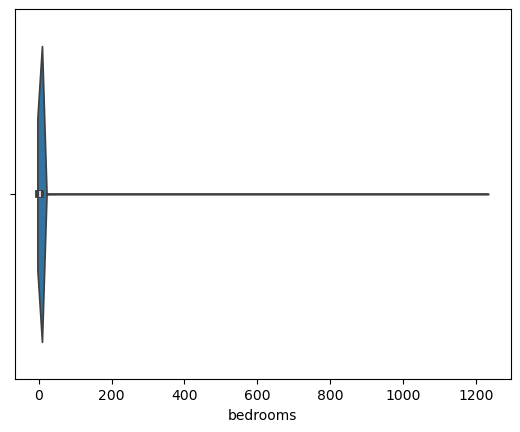

In [311]:
# Create a violin plot to visualize the distribution of the number of bedrooms across all properties

sns.violinplot(x= 'bedrooms', data=df)

In [312]:
# Preserve original bedroom values for anomaly detection
df['bedrooms_raw'] = df['bedrooms']

# Cap extreme bedroom values at 10 for modeling
df['bedrooms'] = df['bedrooms'].clip(upper=10)
df.shape

(11537, 18)

### 7b)Handling Extreme Bathroom Values

We preserve the original number of bathrooms in a separate column (`bathrooms_raw`) for anomaly detection.  

For modeling purposes, we **cap bathroom counts at 10** to reduce the impact of extreme values, which are rare and could skew the model.  

This ensures that:  
- Original bathroom data is retained for detecting anomalies.  
- The feature remains within a reasonable range for machine learning.  
- Outliers do not disproportionately influence the model’s predictions.


In [313]:
df.sort_values(by='bathrooms',ascending=True).tail(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate,bedrooms_raw
12750,12758,12000.0,per month,1,11,1.0,0,0,0,1,For Rent,House,Missing,Mombasa,Nyali,Missing,2022-01-19 13:28:46,1
2606,2607,450000.0,per month,10,11,3.0,0,0,0,0,For Rent,House,Missing,Nairobi,Karen,Missing,2020-07-24 15:45:11,10
2760,2761,450000.0,per month,10,11,3.0,0,0,0,0,For Rent,House,Missing,Nairobi,Karen,Missing,2020-07-24 22:49:46,10
3419,3420,28000000.0,Sale,10,20,3.0,0,0,0,0,For Sale,Apartment,Missing,Kiambu,Kikuyu,Missing,2020-07-29 13:49:33,50
8813,8814,8500000.0,Sale,3,21,3.0,0,0,0,1,For Sale,Apartment,Missing,Kilifi,Mtwapa,Missing,2021-06-22 08:58:52,3
11489,11490,13000.0,per month,2,23,2.0,0,0,0,2,For Rent,House,Missing,Mombasa,Bamburi,Missing,2021-11-30 11:08:49,2
15731,15739,120000.0,per month,3,32,3.0,0,0,0,2,For Rent,Apartment,Missing,Nairobi,Westlands,Missing,2022-05-31 12:18:13,3
15882,15890,30000.0,per month,3,32,3.0,0,0,0,2,For Rent,House,Terraced Duplex,Nakuru,London,Missing,2022-06-06 18:04:43,3
10477,10478,12250000.0,Sale,2,32,3.0,0,1,0,0,For Sale,Apartment,Missing,Nairobi,Lavington,Missing,2021-10-18 11:28:13,2
9764,9765,59000000.0,Sale,4,54,4.0,0,1,0,0,For Sale,House,Townhouse,Mombasa,Nyali,Missing,2021-09-14 07:19:52,4


<Axes: xlabel='bathrooms'>

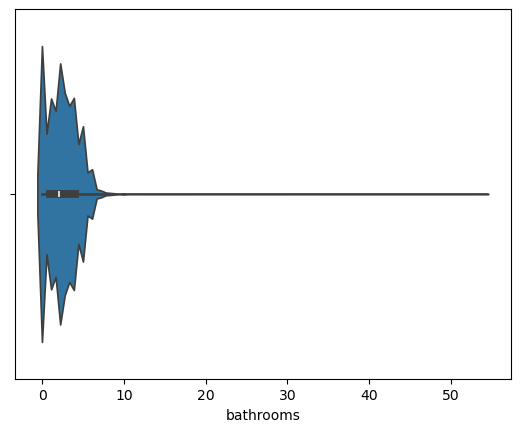

In [314]:
sns.violinplot(x= 'bathrooms', data=df)

In [315]:
# Preserve original bathrooms for anomaly detection
df['bathrooms_raw'] = df['bathrooms']

# Cap extreme bathrooms at 10 for modeling
df['bathrooms'] = df['bathrooms'].clip(upper=10)
df.shape

(11537, 19)

### 7c)Handling Extreme Parking Values

We preserve the original number of parking spaces in a separate column (`parking_raw`) for anomaly detection purposes.  

For modeling, we **cap the number of parking spaces at 10**, as extremely high values are rare and could skew the machine learning model.  

This approach allows us to:  
- Keep the original data intact for analysis of anomalies.  
- Reduce the impact of extreme outliers on model performance.  
- Ensure numerical features remain within a reasonable range for training.


In [316]:
df.sort_values(by='parking').tail()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate,bedrooms_raw,bathrooms_raw
14672,14680,1200000.0,per month,8,4,4.0,0,0,0,50,For Rent,House,Missing,Nairobi,Lavington,Missing,2022-03-23 21:47:55,8,4
15742,15750,35000.0,per month,1,1,1.0,0,0,0,100,For Rent,Apartment,Missing,Kiambu,Ruaka,Missing,2022-05-31 16:07:22,1,1
15188,15196,110000000.0,Sale,0,0,3.0,0,0,0,200,For Sale,Apartment,Block of Flats,Kiambu,Kikuyu,Missing,2022-04-27 06:55:35,0,0
15767,15775,11000.0,per month,1,1,1.0,0,0,0,118453525,For Rent,Apartment,Missing,Kisumu,Market Milimani,Missing,2022-06-01 17:09:34,1,1
15756,15764,9000.0,per month,1,0,1.0,0,0,0,723110898,For Rent,House,Missing,Kiambu,Ruaka,Missing,2022-06-01 13:25:40,1,0


<Axes: xlabel='parking'>

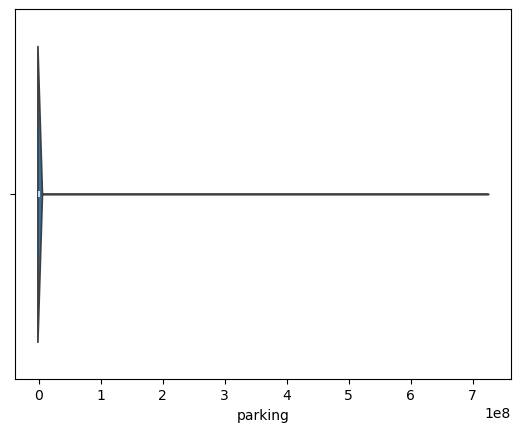

In [317]:
sns.violinplot(x= 'parking', data=df)

In [318]:
# Preserve raw parking values for anomaly detection
df['parking_raw'] = df['parking']

# Cap extreme parking values at 10 for modeling
df['parking'] = df['parking'].clip(upper=10)

df.shape

(11537, 20)

# 8. Segmentation (sale vs rental)

We divide the dataset into two separate DataFrames to handle rental and sale properties independently:

- **df_rental**: Contains only properties listed for rent.  
- **df_sale**: Contains only properties listed for sale.  

This separation allows us to perform specific transformations and analyses for rentals and sales, such as capping rental prices within realistic ranges and handling sale price outliers. Using `.copy()` ensures that modifications to these subsets do not affect the original dataset.


In [319]:
# Split the dataset into two separate DataFrames:
# df_rental: contains only properties listed for rent
# df_sale: contains only properties listed for sale

df_rental = df[df.category == 'For Rent'].copy()
df_sale   = df[df.category == 'For Sale'].copy()

### 8a)Handling Extreme Rental Prices

The Kenya Property Centre dataset shows that the **highest rental value in Nairobi** is around 600,000 KES, while the **lowest rental value** is approximately 5,500 KES.  

To ensure that the dataset reflects realistic market prices and to avoid extreme outliers affecting the machine learning model, we cap rental prices to a **reasonable range**. This allows us to:  

- Preserve all listings while keeping the numerical values within realistic limits.  
- Maintain the original prices for anomaly detection by storing them in a separate column (`price_raw`).  
- Improve model stability and performance by reducing the impact of extreme values.  

> Note: We cap the prices rather than removing rows entirely, as extreme rentals may still be relevant for anomaly detection.


In [320]:
df_rental.shape

(5499, 20)

In [321]:
# Preserve original rental prices for anomaly detection
df_rental['price_raw'] = df_rental['price']

# Cap rental prices to realistic limits for modeling
df_rental['price'] = df_rental['price'].clip(lower=5500, upper=600000)

# Check how many rentals were originally out of these realistic bounds
out_of_range_rent = df_rental[(df_rental['price_raw'] < 5500) | (df_rental['price_raw'] > 600000)]
print("Number of rental properties outside realistic range:", out_of_range_rent.shape[0])

Number of rental properties outside realistic range: 118


### 8b)Handling Extreme Sale Prices

Some property listings in the dataset have **unusually low or extremely high sale prices**. These extreme values are rare and can skew the machine learning model if left unadjusted.  

To address this:  
- We **cap prices** at a realistic range (600,000 KES to 100,000,000 KES) to prevent outliers from dominating the model’s learning process.  
- At the same time, we **preserve the original prices** in a separate column so that rare or unusual listings can still be analyzed for **anomaly detection**.  

This approach balances **model training** with the ability to **identify pricing anomalies**, which is a key goal of the project.


In [322]:
# Inspect sale properties with unusually low prices (less than 500,000 KES)
# This helps identify potential outliers, data entry errors, or mispriced listings

df_sale.loc[(df_sale['price']<500000)].head()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate,bedrooms_raw,bathrooms_raw,parking_raw
484,485,14.5,Sale,2,2,3.0,0,0,0,0,For Sale,Apartment,Missing,Mombasa,Likoni,Missing,2020-07-19 00:00:00,2,2,0
704,705,160000.0,Sale,3,3,3.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,2020-07-20 00:00:00,3,3,0
1025,1026,80000.0,Sale,3,4,3.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,2020-07-21 00:00:00,3,4,0
1076,1077,150000.0,Sale,4,0,3.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,2020-07-21 00:00:00,4,0,0
1365,1366,17.4,Sale,2,0,3.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Kileleshwa,Missing,2020-07-21 00:00:00,2,0,0


In [323]:
# Check how many sale properties have prices below 600,000 KES
# This helps quantify potentially unrealistic or outlier listings in the dataset

df_sale.loc[(df_sale['price']<600000)].shape

(50, 20)

In [324]:
df_sale.sort_values(by='price').tail(10)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate,bedrooms_raw,bathrooms_raw,parking_raw
492,493,450000000.0,Sale,9,8,3.0,0,0,0,0,For Sale,House,Detached Duplex,Nairobi,Lavington,Missing,2020-07-19 00:00:00,9,8,0
2746,2747,500000000.0,Sale,3,3,3.0,0,0,0,0,For Sale,House,Townhouse,Nairobi,Karen,Missing,2020-07-24 21:03:44,3,3,0
9685,9686,500000000.0,Sale,6,8,8.0,0,0,0,5,For Sale,House,Missing,Nairobi,Muthaiga,Missing,2021-09-07 23:09:33,6,8,5
9686,9687,650000000.0,Sale,5,7,7.0,0,0,0,5,For Sale,House,Missing,Nairobi,Muthaiga,Missing,2021-09-07 23:17:28,5,7,5
10120,10121,650000000.0,Sale,5,6,6.0,0,0,0,7,For Sale,House,Missing,Nairobi,Muthaiga,Missing,2021-09-27 00:59:45,5,6,7
7880,7881,675000000.0,Sale,0,0,3.0,0,1,0,0,For Sale,Apartment,Missing,Nairobi,Lavington,Missing,2020-08-27 03:09:33,0,0,0
491,492,700000000.0,Sale,4,4,3.0,0,0,0,0,For Sale,House,Townhouse,Nairobi,Lavington,Missing,2020-07-19 00:00:00,4,4,0
2723,2724,720000000.0,Sale,5,0,3.0,0,0,0,0,For Sale,House,Detached Duplex,Baringo,Kabarnet,Missing,2020-07-24 20:36:28,5,0,0
498,499,750000000.0,Sale,10,10,3.0,0,0,0,0,For Sale,House,Missing,Nairobi,Nairobi Central,Missing,2020-07-19 00:00:00,10,10,0
5635,5636,790000000.0,Sale,4,0,3.0,0,0,0,0,For Sale,House,Detached Duplex,Nairobi,Westlands,Runda,2020-08-16 03:16:54,4,0,0


In [325]:
df.loc[(df['price']>100000000)].shape

(349, 20)

In [326]:
# Preserve original sale prices for anomaly detection
df_sale['price_raw'] = df_sale['price']  # keep original prices to detect anomalies later

# Cap extreme sale prices for modeling
# Reasoning: Sale prices below 600,000 or above 100,000,000 KES are extremely rare/outliers
df_sale['price'] = df_sale['price'].clip(lower=600000, upper=100000000)

# Inspect how many sale listings were originally out of these realistic bounds
out_of_range_sale = df_sale[(df_sale['price_raw'] < 600000) | (df_sale['price_raw'] > 100000000)]
print("Number of sale properties outside realistic range:", out_of_range_sale.shape[0])

Number of sale properties outside realistic range: 395


In [327]:
df_sale.shape

(6038, 21)

In [328]:
df_rental.shape

(5499, 21)

In [329]:
# Combine rentals and sales into a single dataframe for EDA
df_combined = pd.concat([df_rental, df_sale], ignore_index=True)

# Check the shape
df_combined.shape

(11537, 21)

In [330]:
df_combined

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,...,type,sub_type,state,locality,sub_locality,listdate,bedrooms_raw,bathrooms_raw,parking_raw,price_raw
0,1,5500.0,per month,3,0,3.0,0,0,0,0,...,Apartment,Missing,Nairobi,Embakasi,Tassia,2020-07-18 00:00:00,3,0,0,5000.0
1,7,200000.0,per month,5,5,5.0,0,0,0,0,...,House,Townhouse,Nairobi,Nairobi Central,Missing,2020-07-18 00:00:00,5,5,0,200000.0
2,8,100000.0,per month,3,3,3.0,0,0,0,0,...,Apartment,Missing,Nairobi,Parklands,Missing,2020-07-18 00:00:00,3,3,0,100000.0
3,10,120000.0,per month,3,3,3.0,0,0,0,0,...,Apartment,Missing,Nairobi,Lavington,Missing,2020-07-18 00:00:00,3,3,0,120000.0
4,11,180000.0,per month,2,2,2.0,1,0,0,0,...,Apartment,Missing,Nairobi,Westlands,Missing,2020-07-18 00:00:00,2,2,0,180000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,16107,26000000.0,Sale,3,4,3.0,0,0,0,0,...,Apartment,Missing,Nairobi,Kileleshwa,Missing,2022-06-16 11:55:28,3,4,0,26000000.0
11533,16111,6450000.0,Sale,1,1,1.0,0,0,0,0,...,Apartment,Missing,Nairobi,Westlands,Missing,2022-06-16 12:21:02,1,1,0,6450000.0
11534,16112,10650000.0,Sale,2,2,2.0,0,0,0,0,...,Apartment,Missing,Nairobi,Westlands,Missing,2022-06-16 12:23:53,2,2,0,10650000.0
11535,16116,5800000.0,Sale,4,4,4.0,0,0,0,4,...,House,Detached Bungalow,Kajiado,Ongata Rongai,Missing,2022-06-16 13:08:35,4,4,4,5800000.0


# 9. Filtering and handling insufficient data


In [331]:
## Check how many properties in the combined dataset have missing sub_locality values

df_combined.loc[(df_combined['sub_locality']=='Missing')].shape

(10751, 21)

In [332]:
#drop the sub-locality column since more than 50% of the valus are missing

df_combined.drop('sub_locality', inplace=True, axis=1)

In [333]:
print(df.columns)

Index(['id', 'price', 'price_qualifier', 'bedrooms', 'bathrooms', 'toilets',
       'furnished', 'serviced', 'shared', 'parking', 'category', 'type',
       'sub_type', 'state', 'locality', 'sub_locality', 'listdate',
       'bedrooms_raw', 'bathrooms_raw', 'parking_raw'],
      dtype='object')


In [334]:
# Check how many properties in the combined dataset have missing price_qualifier values

df_combined.loc[(df_combined['price_qualifier']=='Missing')].shape


(0, 20)

### 9a)filtering low-sample counties
In this step, we removed properties located in states that have fewer than **500 listings**. This ensures that our analysis and modeling are based on areas with sufficient data, improving reliability and reducing noise from regions with very few entries.  

By keeping only **Nairobi, Kiambu, Kajiado, and Mombasa**, we focus on counties with enough property listings to support robust pricing analysis and anomaly detection, while avoiding skewed results from sparse data in other states.

In [335]:
# Display the count of properties per state/county in the combined dataset

df_combined.state.value_counts()

state
Nairobi          7139
Kiambu           1515
Kajiado           872
Mombasa           831
Machakos          350
Kilifi            232
Nakuru            152
Kisumu            107
Uasin Gishu        37
Kwale              31
Laikipia           29
Embu               29
Nandi              29
Meru               26
Baringo            23
Nyeri              19
Muranga            17
Makueni            14
Kitui              10
Bungoma            10
Kirinyaga           8
Trans Nzoia         8
Isiolo              7
Kakamega            7
Kericho             7
Kisii               6
Nyandarua           3
Bomet               3
Busia               3
Lamu                2
Homa Bay            2
Migori              1
Tharaka-Nithi       1
Garissa             1
Marsabit            1
Samburu             1
Vihiga              1
Narok               1
Turkana             1
West Pokot          1
Name: count, dtype: int64

In [336]:
df_combined.loc[
    (df_combined['state'] != 'Nairobi') &
    (df_combined['state'] != 'Kiambu') &
    (df_combined['state'] != 'Kajiado') &
    (df_combined['state'] != 'Mombasa')
].shape

(1180, 20)

In [337]:
# Remove properties in states with fewer than 500 listings using the combined dataset
df_combined = df_combined.loc[
    (df_combined['state'] == 'Nairobi') |
    (df_combined['state'] == 'Kiambu') |
    (df_combined['state'] == 'Kajiado') |
    (df_combined['state'] == 'Mombasa')
]
df_combined.shape


(10357, 20)

### 9b)Filtering filtering low-sample localities

Some localities in the dataset have very few property listings, which can make analysis and modeling less reliable.  
We filter the combined dataset to **keep only localities with at least 75 listings**:

In [338]:
df_combined.locality.value_counts()

locality
Westlands     1856
Kilimani      1032
Lavington      783
Kileleshwa     714
Karen          602
              ... 
Kimana           1
Kijabe           1
Kalimoni         1
Chokaa           1
Maringo          1
Name: count, Length: 120, dtype: int64

In [339]:
df_combined = df_combined[df_combined.groupby('locality').locality.transform('count') >= 75]
df_combined.shape

(9091, 20)

# 10. Data type standardization

In [340]:
# Convert 'listdate' to datetime in the combined dataframe
df_combined['listdate'] = pd.to_datetime(df_combined['listdate'])

# Convert 'listdate' to datetime in the rental dataframe
df_rental['listdate'] = pd.to_datetime(df_rental['listdate'])

# Convert 'listdate' to datetime in the sale dataframe
df_sale['listdate'] = pd.to_datetime(df_sale['listdate'])

In [341]:
df_combined.head()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate,bedrooms_raw,bathrooms_raw,parking_raw,price_raw
0,1,5500.0,per month,3,0,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Embakasi,2020-07-18,3,0,0,5000.0
1,7,200000.0,per month,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2020-07-18,5,5,0,200000.0
2,8,100000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Parklands,2020-07-18,3,3,0,100000.0
3,10,120000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Lavington,2020-07-18,3,3,0,120000.0
4,11,180000.0,per month,2,2,2.0,1,0,0,0,For Rent,Apartment,Missing,Nairobi,Westlands,2020-07-18,2,2,0,180000.0


In [342]:
df_combined.tail()

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate,bedrooms_raw,bathrooms_raw,parking_raw,price_raw
11532,16107,26000000.0,Sale,3,4,3.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Kileleshwa,2022-06-16 11:55:28,3,4,0,26000000.0
11533,16111,6450000.0,Sale,1,1,1.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,2022-06-16 12:21:02,1,1,0,6450000.0
11534,16112,10650000.0,Sale,2,2,2.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,2022-06-16 12:23:53,2,2,0,10650000.0
11535,16116,5800000.0,Sale,4,4,4.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Ongata Rongai,2022-06-16 13:08:35,4,4,4,5800000.0
11536,16123,6000000.0,Sale,3,3,3.0,0,0,0,4,For Sale,House,Detached Bungalow,Kajiado,Kitengela,2022-06-16 14:54:29,3,3,4,6000000.0


In [343]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 11536
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               9091 non-null   int64         
 1   price            9091 non-null   float64       
 2   price_qualifier  9091 non-null   object        
 3   bedrooms         9091 non-null   int64         
 4   bathrooms        9091 non-null   int64         
 5   toilets          9091 non-null   float64       
 6   furnished        9091 non-null   int64         
 7   serviced         9091 non-null   int64         
 8   shared           9091 non-null   int64         
 9   parking          9091 non-null   int64         
 10  category         9091 non-null   object        
 11  type             9091 non-null   object        
 12  sub_type         9091 non-null   object        
 13  state            9091 non-null   object        
 14  locality         9091 non-null   object     

In [344]:
# Define the path to the processed folder relative to the notebook
output_dir = '../data/processed'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the cleaned combined DataFrame
df_combined.to_csv(os.path.join(output_dir, 'cleaned_listings.csv'), index=False)

# Optional: Save the separate rental and sale datasets too
df_rental.to_csv(os.path.join(output_dir, 'cleaned_rental_listings.csv'), index=False)
df_sale.to_csv(os.path.join(output_dir, 'cleaned_sale_listings.csv'), index=False)

print("All cleaned datasets have been saved to the processed folder!")

All cleaned datasets have been saved to the processed folder!



#  Section 2: <h>Exploratory Data Analysis(EDA)</h2>



This section explores the cleaned real estate dataset to understand price distributions, feature behavior, and structural patterns that inform the development of a price fairness classification model.

 The purpose of this EDA is to examine raw pricing behavior and feature relationships that will later support feature engineering and class label construction.



In [345]:
# Quick overview of the combined dataset

df_combined.info()
df_combined.describe(include='all')
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 11536
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               9091 non-null   int64         
 1   price            9091 non-null   float64       
 2   price_qualifier  9091 non-null   object        
 3   bedrooms         9091 non-null   int64         
 4   bathrooms        9091 non-null   int64         
 5   toilets          9091 non-null   float64       
 6   furnished        9091 non-null   int64         
 7   serviced         9091 non-null   int64         
 8   shared           9091 non-null   int64         
 9   parking          9091 non-null   int64         
 10  category         9091 non-null   object        
 11  type             9091 non-null   object        
 12  sub_type         9091 non-null   object        
 13  state            9091 non-null   object        
 14  locality         9091 non-null   object     

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate,bedrooms_raw,bathrooms_raw,parking_raw,price_raw
0,1,5500.0,per month,3,0,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Embakasi,2020-07-18,3,0,0,5000.0
1,7,200000.0,per month,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2020-07-18,5,5,0,200000.0
2,8,100000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Parklands,2020-07-18,3,3,0,100000.0
3,10,120000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Lavington,2020-07-18,3,3,0,120000.0
4,11,180000.0,per month,2,2,2.0,1,0,0,0,For Rent,Apartment,Missing,Nairobi,Westlands,2020-07-18,2,2,0,180000.0


# 1.Price Distribution (Overall + Rent vs Sale)

Understanding the distribution of listing prices is critical for identifying skewness, outliers, and structural differences between rental and sale properties.

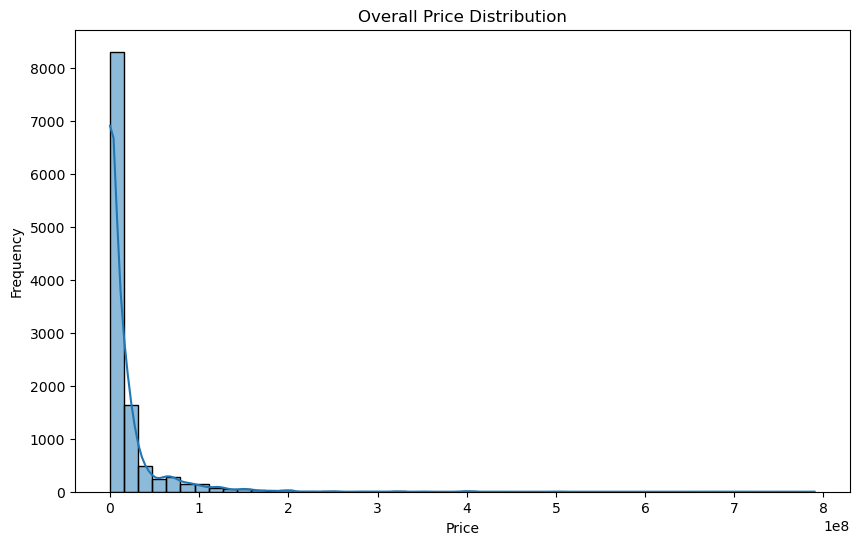

In [346]:
# Overall price distribution

plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Overall Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

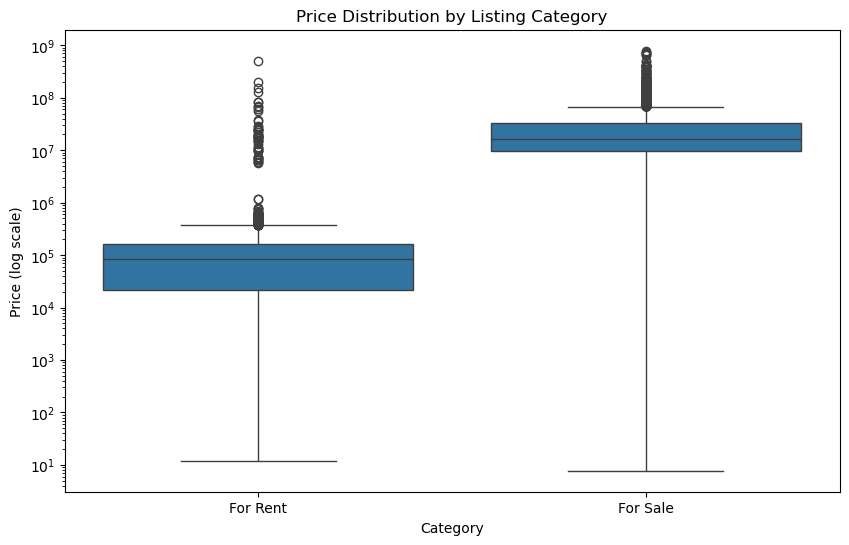

In [347]:
# Price distribution by listing category (rent vs sale)

plt.figure(figsize=(10,6))
sns.boxplot(x="category", y="price", data=df)
plt.yscale("log")
plt.title("Price Distribution by Listing Category")
plt.xlabel("Category")
plt.ylabel("Price (log scale)")
plt.show()


# 2. Price vs Core Property Features

This section examines how price varies with fundamental housing attributes such as bedrooms, bathrooms, toilets, and parking availability.
These relationships help validate whether the dataset reflects real-world economic intuition.


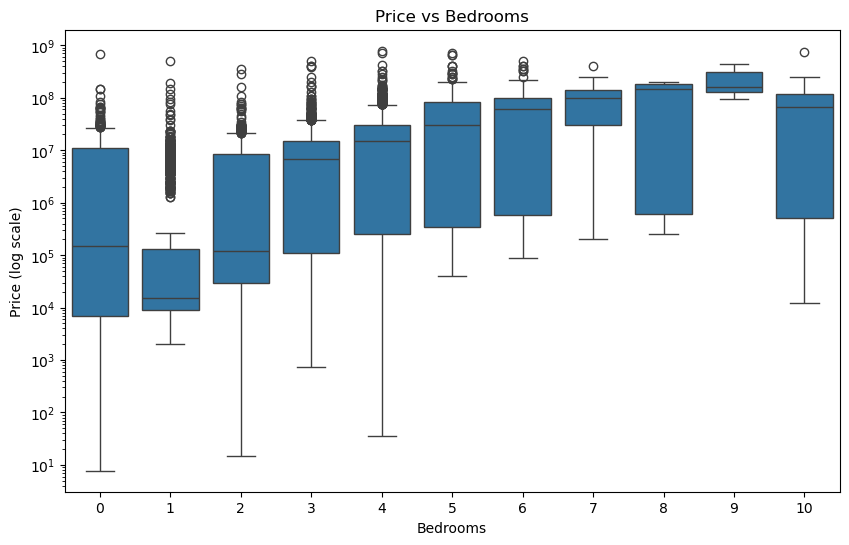

In [348]:
# Price vs Bedrooms

plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price (log scale)")
plt.show()


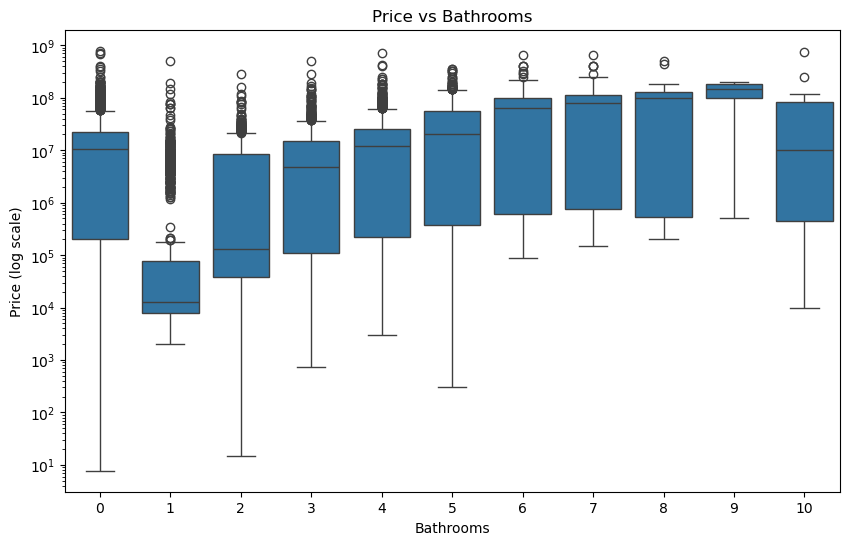

In [349]:
# Price vs Bathrooms

plt.figure(figsize=(10,6))
sns.boxplot(x="bathrooms", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price (log scale)")
plt.show()


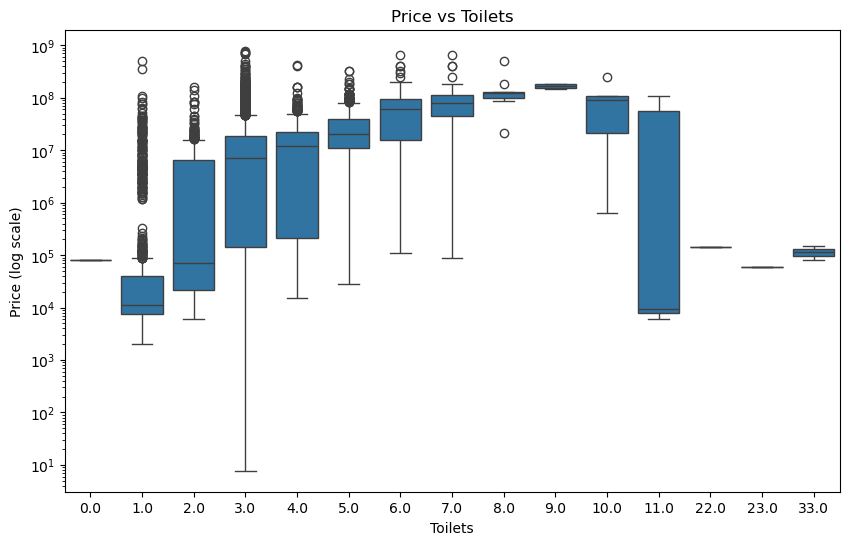

In [350]:
# Price vs Toilets

plt.figure(figsize=(10,6))
sns.boxplot(x="toilets", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Toilets")
plt.xlabel("Toilets")
plt.ylabel("Price (log scale)")
plt.show()


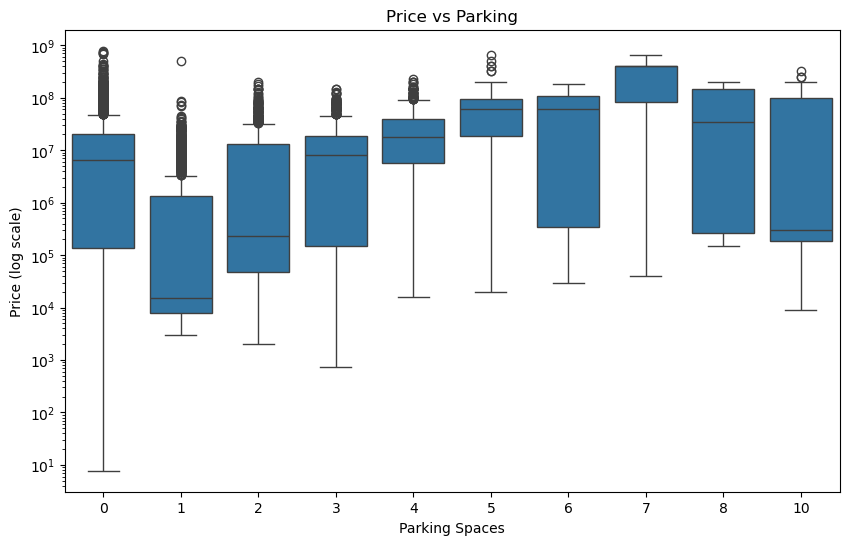

In [351]:
# Price vs Parking

plt.figure(figsize=(10,6))
sns.boxplot(x="parking", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Parking")
plt.xlabel("Parking Spaces")
plt.ylabel("Price (log scale)")
plt.show()


# 3. Price vs Location

### Location Effects

Location is a primary driver of real estate pricing.
This section explores how prices vary across the most represented states and localities.


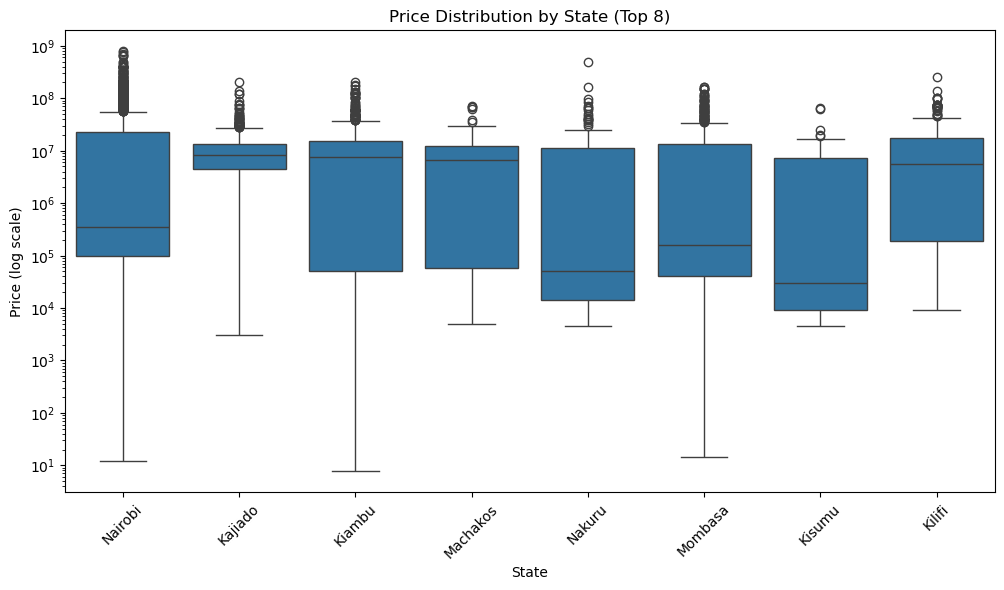

In [352]:
# Top 8 states by listing volume
top_states = df["state"].value_counts().head(8).index

# Price distribution by state
plt.figure(figsize=(12,6))
sns.boxplot(x="state", y="price", data=df[df["state"].isin(top_states)])
plt.yscale("log")
plt.title("Price Distribution by State (Top 8)")
plt.xlabel("State")
plt.ylabel("Price (log scale)")
plt.xticks(rotation=45)
plt.show()


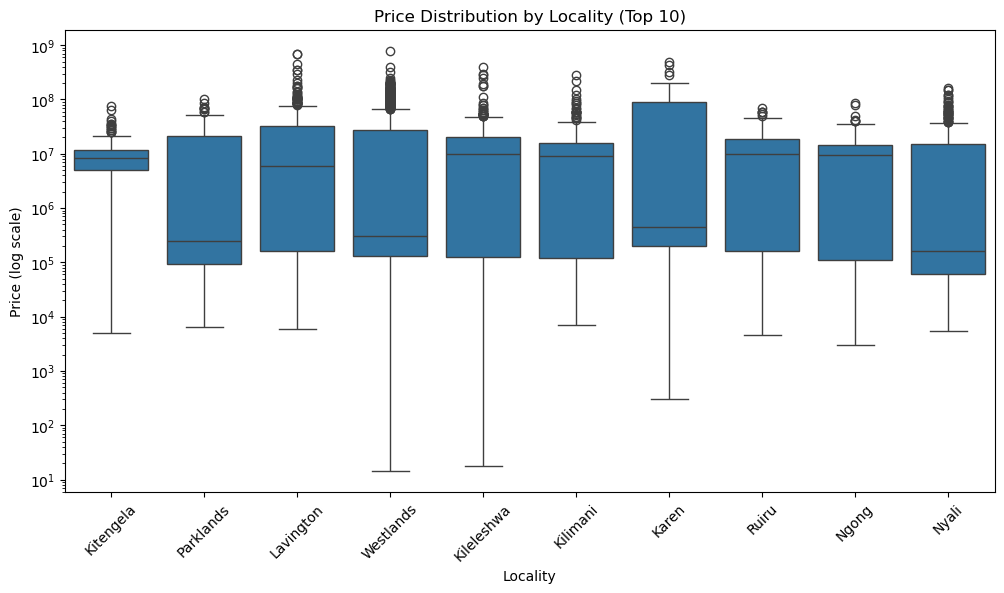

In [353]:
# Top 10 localities by volume
top_localities = df["locality"].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(x="locality", y="price", data=df[df["locality"].isin(top_localities)])
plt.yscale("log")
plt.title("Price Distribution by Locality (Top 10)")
plt.xlabel("Locality")
plt.ylabel("Price (log scale)")
plt.xticks(rotation=45)
plt.show()


# 4. Price vs Property Type

### Property Type Effects

This section analyzes how pricing varies across different property types and sub-types.


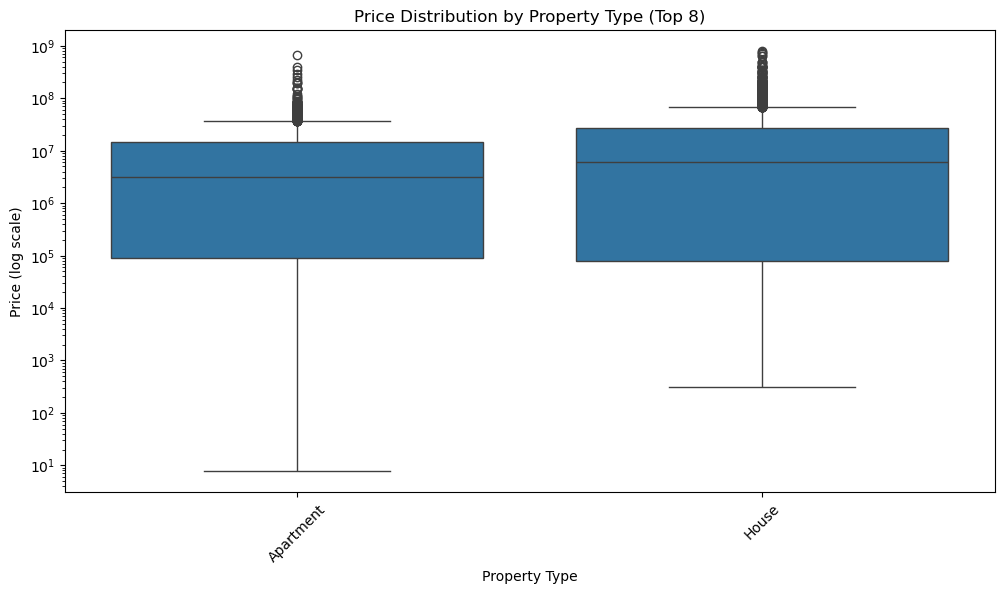

In [354]:
# Top property types
top_types = df["type"].value_counts().head(8).index

# Price by property type
plt.figure(figsize=(12,6))
sns.boxplot(x="type", y="price", data=df[df["type"].isin(top_types)])
plt.yscale("log")
plt.title("Price Distribution by Property Type (Top 8)")
plt.xlabel("Property Type")
plt.ylabel("Price (log scale)")
plt.xticks(rotation=45)
plt.show()


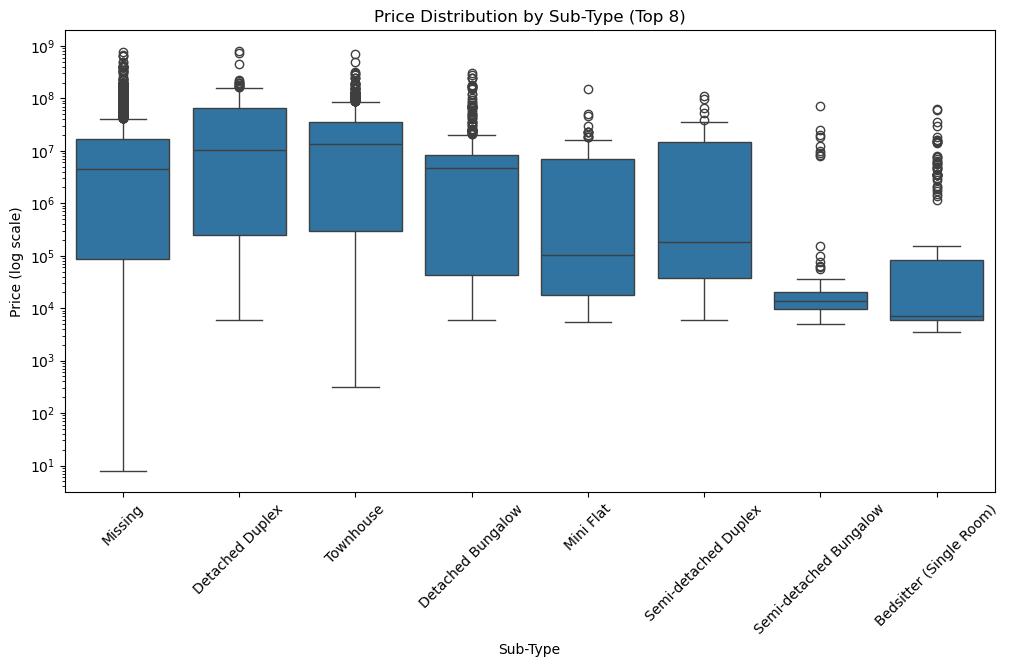

In [355]:
# Top sub-types
top_subtypes = df["sub_type"].value_counts().head(8).index

plt.figure(figsize=(12,6))
sns.boxplot(x="sub_type", y="price", data=df[df["sub_type"].isin(top_subtypes)])
plt.yscale("log")
plt.title("Price Distribution by Sub-Type (Top 8)")
plt.xlabel("Sub-Type")
plt.ylabel("Price (log scale)")
plt.xticks(rotation=45)
plt.show()


# 5. Amenity Effects

This section explores how amenities such as furnishing, servicing, and shared occupancy influence pricing behavior.


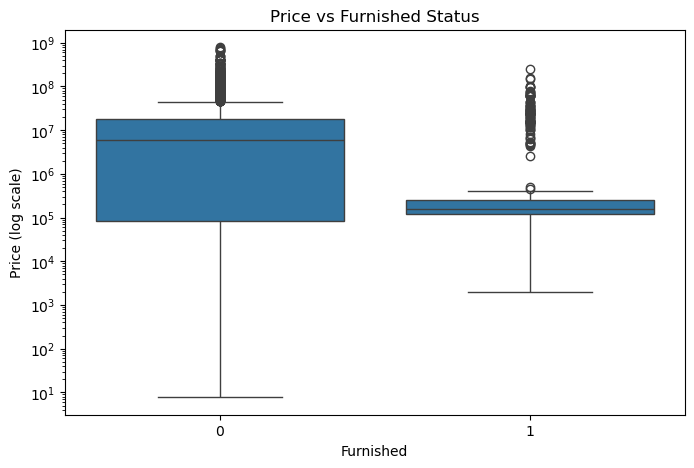

In [356]:
# Furnished vs price
plt.figure(figsize=(8,5))
sns.boxplot(x="furnished", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Furnished Status")
plt.xlabel("Furnished")
plt.ylabel("Price (log scale)")
plt.show()


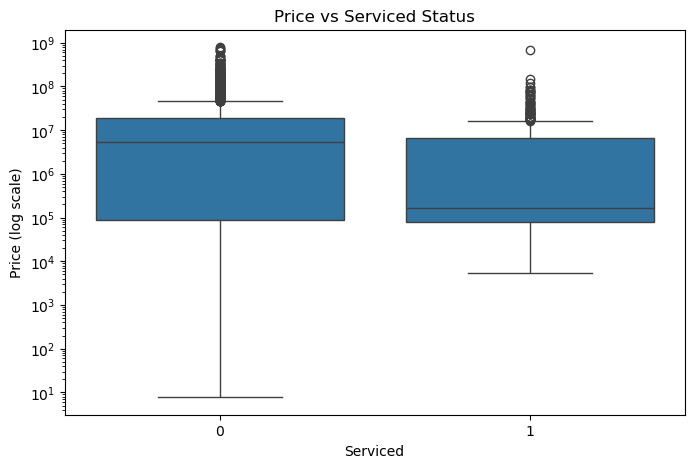

In [357]:
# Serviced vs price
plt.figure(figsize=(8,5))
sns.boxplot(x="serviced", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Serviced Status")
plt.xlabel("Serviced")
plt.ylabel("Price (log scale)")
plt.show()


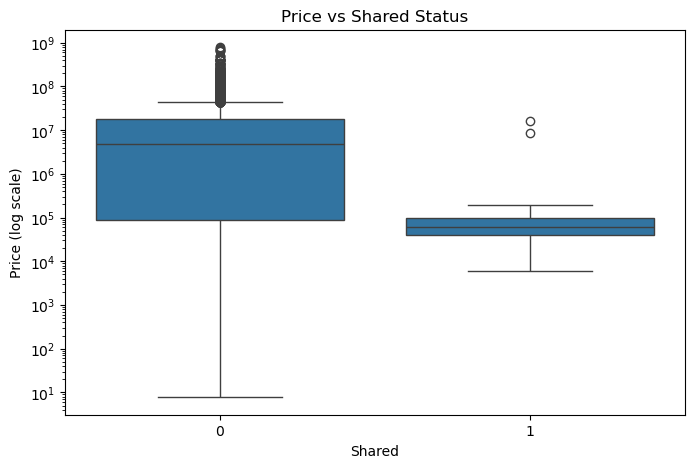

In [358]:
# Shared vs price
plt.figure(figsize=(8,5))
sns.boxplot(x="shared", y="price", data=df)
plt.yscale("log")
plt.title("Price vs Shared Status")
plt.xlabel("Shared")
plt.ylabel("Price (log scale)")
plt.show()


# 6. Correlation Analysis (Numeric Features)

This section evaluates correlations between numeric features to identify potential multicollinearity and confirm expected economic relationships.


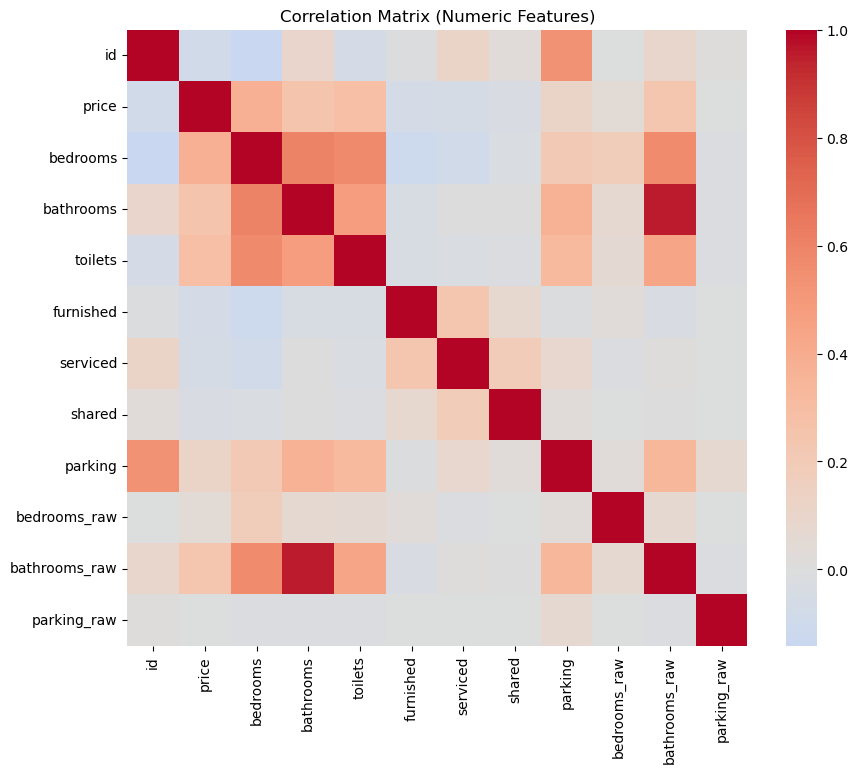

In [359]:
# Correlation matrix for numeric features
num_cols = df.select_dtypes(include=["int64", "float64"])
corr = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


In [360]:
# Correlation of numeric features with price
corr["price"].sort_values(ascending=False)


price            1.000000
bedrooms         0.382048
toilets          0.284587
bathrooms        0.253860
bathrooms_raw    0.236633
parking          0.112977
bedrooms_raw     0.042760
parking_raw     -0.004762
shared          -0.031587
serviced        -0.059155
furnished       -0.068942
id              -0.084730
Name: price, dtype: float64

# 7. Outlier Analysis

Outliers can distort downstream modeling and price fairness labeling.
This section visualizes extreme values in key numeric variables.


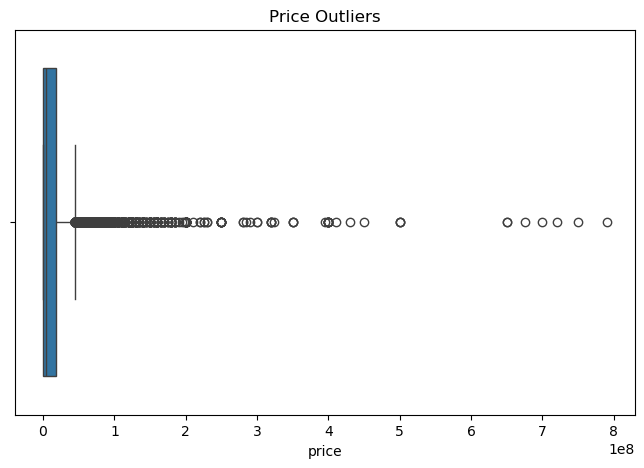

In [361]:
# Price outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.show()


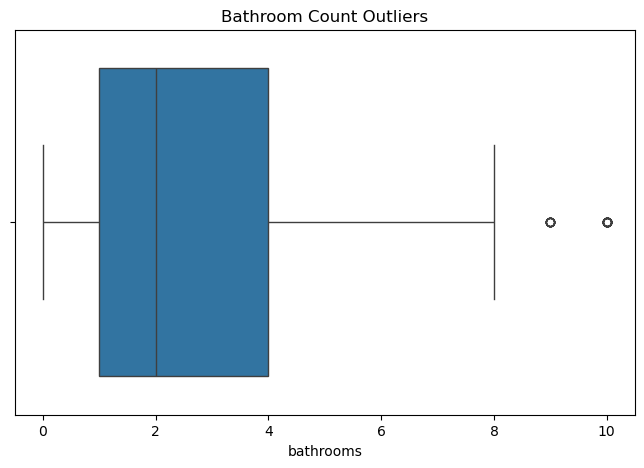

In [362]:
# Bathroom count outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["bathrooms"])
plt.title("Bathroom Count Outliers")
plt.show()


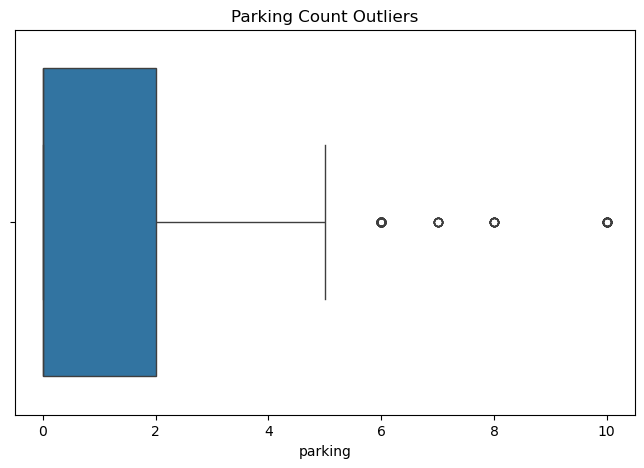

In [363]:
# Parking outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["parking"])
plt.title("Parking Count Outliers")
plt.show()


# 8. Time-Based Listing Patterns

This section explores listing activity over time to identify potential seasonality or data collection biases.
This analysis informs whether temporal features should be engineered later.


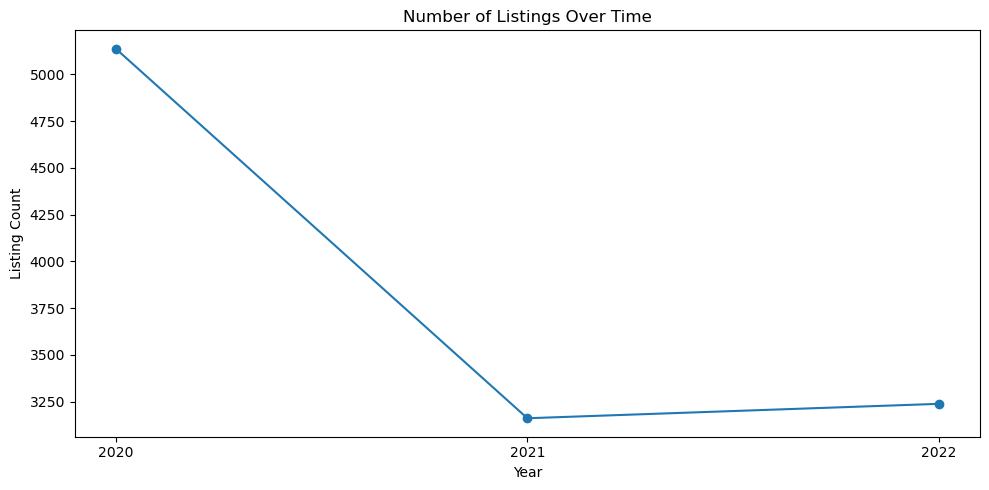

In [364]:
# Ensure listdate is datetime
df["listdate"] = pd.to_datetime(df["listdate"], errors="coerce")

# Create year column safely
df["year"] = df["listdate"].dt.year

# Aggregate counts per year
year_counts = df.groupby("year").size()

# Plot with clean formatting
plt.figure(figsize=(10, 5))
year_counts.plot(kind="line", marker="o")
plt.title("Number of Listings Over Time")
plt.xlabel("Year")
plt.ylabel("Listing Count")

# Force integer ticks
plt.xticks(year_counts.index)

plt.tight_layout()
plt.show()


## EDA Summary & Implications for Feature Engineering

Key insights from the EDA:

- Property prices are highly right-skewed, suggesting that log transformations or robust models may be useful.
- Bedrooms, bathrooms, toilets, and parking show strong positive relationships with price.
- Location (state and locality) exhibits substantial price dispersion, confirming its importance as a predictive feature.
- Furnished and serviced properties generally command higher prices.
- Several extreme price and amenity outliers exist and will be handled during feature engineering.
- Temporal listing patterns suggest mild seasonality but not strong enough to justify direct time-series modeling.

These insights motivate the next stage of feature engineering, including:
- Price normalization and deviation calculations  
- Construction of price fairness labels  
- Encoding of location and property type  
- Outlier mitigation strategies  
- Feature scaling and transformation


# Section 3: Feature Engineering

This section transforms the cleaned dataset into model-ready features and constructs the supervised learning target.

Design principles:
- Capped numeric features are used for model stability
- Raw price values are preserved for true anomaly measurement
- Fairness labels are created using raw prices relative to market benchmarks
- Segmented datasets (rental vs sale) are supported but a unified model is trained
- Leakage-prone features are excluded from training

Key outputs:
- Market benchmark price per location–type–category group
- Price deviation percentage
- Fairness classification label (Underpriced / Fair / Overpriced)
- Encoded feature matrix for machine learning



### 1. Create Time Features

In [365]:
# Create Time-Based Features
df_combined["listdate"] = pd.to_datetime(df_combined["listdate"], errors="coerce")

df_combined["year"] = df_combined["listdate"].dt.year
df_combined["month"] = df_combined["listdate"].dt.month
df_combined["day_of_week"] = df_combined["listdate"].dt.dayofweek

df_combined = df_combined.drop(columns=["listdate"])



### 2. Market Benchmark (CAPPED price)

In [366]:
# Market Benchmark Price (Using CAPPED price)
market_price = (
    df_combined
    .groupby(["state", "locality", "type", "category"])["price"]
    .median()
    .reset_index()
    .rename(columns={"price": "market_price"})
)

df_combined = df_combined.merge(
    market_price,
    on=["state", "locality", "type", "category"],
    how="left"
)


### 3.True Pricing Deviation (RAW price)

In [367]:
# Pricing Deviation (Using RAW price)
df_combined["price_diff_pct"] = (
    (df_combined["price_raw"] - df_combined["market_price"]) /
    df_combined["market_price"]
)


### 4. Fairness Label

In [368]:
# Create Price Fairness Label

def price_label(diff):
    if diff < -0.20:
        return "Underpriced"
    elif diff > 0.20:
        return "Overpriced"
    else:
        return "Fair"

df_combined["price_label"] = df_combined["price_diff_pct"].apply(price_label)

df_combined["price_label"].value_counts(normalize=True)


price_label
Overpriced     0.349687
Fair           0.328347
Underpriced    0.321967
Name: proportion, dtype: float64

### 5. Modeling Dataset (Leakage Control)

In [369]:
# Prepare Modeling Dataset

leakage_cols = [
    "id",
    "market_price",
    "price_diff_pct",
    "price_raw",      # prevents leakage
    "bedrooms_raw",
    "bathrooms_raw",
    "parking_raw"
]

df_model = df_combined.drop(columns=leakage_cols)


### 6. Encode Binary Features

In [370]:
# Encode Binary Feature Columns
binary_cols = ["furnished", "serviced", "shared"]

df_model[binary_cols] = df_model[binary_cols].astype(int)


### 7. One-Hot Encoding

In [371]:
# One-Hot Encode Categorical Features

categorical_cols = [
    "price_qualifier",
    "category",
    "type",
    "sub_type",
    "state",
    "locality"
]

df_model = pd.get_dummies(
    df_model,
    columns=categorical_cols,
    drop_first=True
)


### 8. Feature Matrix

In [372]:
# Final Feature Matrix

X = df_model.drop(columns=["price_label"])
y = df_model["price_label"]

X.shape, y.value_counts()


((9091, 50),
 price_label
 Overpriced     3179
 Fair           2985
 Underpriced    2927
 Name: count, dtype: int64)

# Section 4: Modeling

This section trains and evaluates supervised classification models to predict property price fairness.

Approach:
1. Stratified train–test split
2. Logistic Regression as a baseline
3. Advanced ensemble model (Random Forest)
4. Class imbalance handling via class weights
5. Model evaluation using:
   - Accuracy
   - Macro F1-score
   - ROC-AUC (OvR)
   - Confusion matrix
6. Feature importance analysis


## 1. Train/Test Split

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## 2. Baseline Model: Logistic Regression

In [374]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Performance\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance

              precision    recall  f1-score   support

        Fair       0.55      0.23      0.32       597
  Overpriced       0.59      0.42      0.49       636
 Underpriced       0.42      0.80      0.55       586

    accuracy                           0.48      1819
   macro avg       0.52      0.48      0.46      1819
weighted avg       0.52      0.48      0.46      1819



## 3. Confusion Matrix (Baseline)

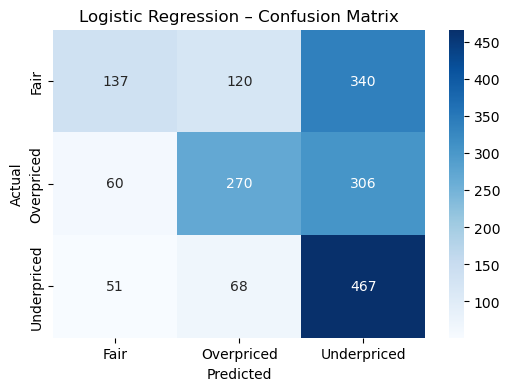

In [375]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_model.classes_,
            yticklabels=log_model.classes_)
plt.title("Logistic Regression – Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## 4. Advanced Model One: Random Forest

In [376]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance

              precision    recall  f1-score   support

        Fair       0.82      0.78      0.80       597
  Overpriced       0.88      0.87      0.87       636
 Underpriced       0.82      0.88      0.85       586

    accuracy                           0.84      1819
   macro avg       0.84      0.84      0.84      1819
weighted avg       0.84      0.84      0.84      1819



## 5. Feature Importance

In [377]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(15)


price                        0.380092
bedrooms                     0.098594
bathrooms                    0.062636
toilets                      0.051660
type_House                   0.035109
state_Nairobi                0.031641
month                        0.029162
day_of_week                  0.024409
locality_Westlands           0.023111
price_qualifier_per month    0.023030
category_For Sale            0.022461
parking                      0.021109
furnished                    0.019694
year                         0.016410
state_Kiambu                 0.013528
dtype: float64

## 6. Plot Top Features

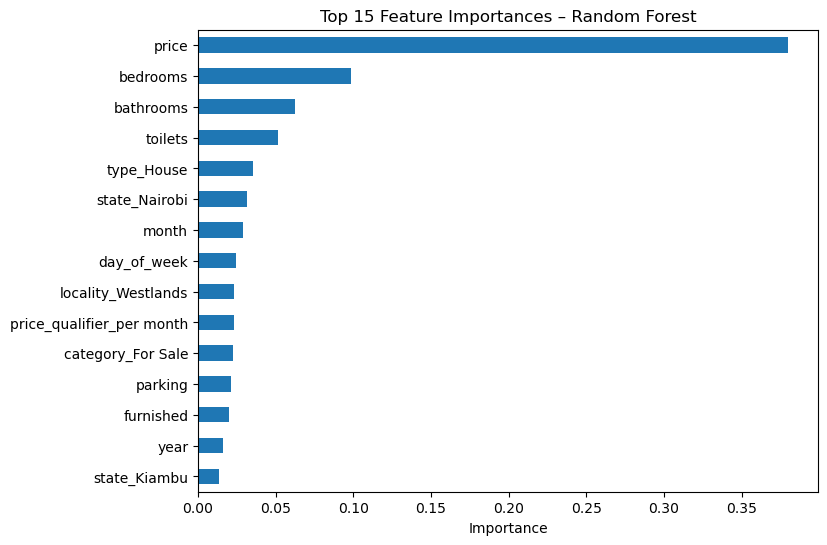

In [378]:
plt.figure(figsize=(8, 6))
importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances – Random Forest")
plt.xlabel("Importance")
plt.show()


## 7.Advanced Model Two: XGBoost

This section extends the baseline and ensemble models by:

1. Training a gradient-boosted decision tree model (XGBoost)

Motivation:
- Rental and sale markets follow fundamentally different pricing dynamics



In [379]:
# Encode target for XGBoost

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train XGBoost Model

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train_enc)


# Evaluate XGBoost
y_pred_xgb_enc = xgb_model.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_xgb_enc)

print("XGBoost Performance (Unified Model)\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance (Unified Model)

              precision    recall  f1-score   support

        Fair       0.92      0.94      0.93       597
  Overpriced       0.97      0.95      0.96       636
 Underpriced       0.96      0.96      0.96       586

    accuracy                           0.95      1819
   macro avg       0.95      0.95      0.95      1819
weighted avg       0.95      0.95      0.95      1819



# Section 5: Segmented Model (Rental vs Sale)

The real estate market operates under two structurally distinct regimes:

- **Rental market**
  - Monthly pricing behavior  
  - Higher supply turnover  
  - Strong sensitivity to amenities (furnishing, parking, servicing)  

- **Sale market**
  - Capital-based pricing  
  - Long-term investment dynamics  
  - Stronger dependence on location and property size  

Training separate models allows each to specialize in its own pricing logic and reduces noise caused by mixing fundamentally different market behaviors.



In [382]:
# Rental: category_For Sale = 0
df_rental = df_model[df_model["category_For Sale"] == 0].copy()
X_rental = df_rental.drop(columns=["price_label", "category_For Sale"])
y_rental = df_rental["price_label"]

# Sale: category_For Sale = 1
df_sale = df_model[df_model["category_For Sale"] == 1].copy()
X_sale = df_sale.drop(columns=["price_label", "category_For Sale"])
y_sale = df_sale["price_label"]

# Check shapes
X_rental.shape, X_sale.shape

((4274, 49), (4817, 49))

## Random Forest: Rent

In [383]:
# Train/Test Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_rental, y_rental, test_size=0.2, stratify=y_rental, random_state=42
)

In [384]:
# Random Forest
rf_rental = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_rental.fit(Xr_train, yr_train)
yr_pred_rf = rf_rental.predict(Xr_test)

print("Random Forest Performance — Rental Market\n")
print(classification_report(yr_test, yr_pred_rf))

Random Forest Performance — Rental Market

              precision    recall  f1-score   support

        Fair       0.81      0.78      0.80       262
  Overpriced       0.90      0.83      0.87       310
 Underpriced       0.81      0.90      0.85       283

    accuracy                           0.84       855
   macro avg       0.84      0.84      0.84       855
weighted avg       0.84      0.84      0.84       855



## Random forest: Sale

In [385]:
# Train/Test Split
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_sale, y_sale, test_size=0.2, stratify=y_sale, random_state=42
)


In [386]:
# Random Forest
rf_sale = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_sale.fit(Xs_train, ys_train)
ys_pred_rf = rf_sale.predict(Xs_test)

print("Random Forest Performance — Sale Market\n")
print(classification_report(ys_test, ys_pred_rf))

Random Forest Performance — Sale Market

              precision    recall  f1-score   support

        Fair       0.83      0.81      0.82       335
  Overpriced       0.86      0.91      0.88       326
 Underpriced       0.89      0.87      0.88       303

    accuracy                           0.86       964
   macro avg       0.86      0.86      0.86       964
weighted avg       0.86      0.86      0.86       964



## XGBoost: Rent

In [389]:
# Encode target
le_r = LabelEncoder()
yr_train_enc = le_r.fit_transform(yr_train)
yr_test_enc  = le_r.transform(yr_test)

# XGBoost
xgb_rental = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=len(le_r.classes_),
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_rental.fit(Xr_train, yr_train_enc)
yr_pred_xgb_enc = xgb_rental.predict(Xr_test)
yr_pred_xgb = le_r.inverse_transform(yr_pred_xgb_enc)

print("XGBoost Performance — Rental Market\n")
print(classification_report(yr_test, yr_pred_xgb))

XGBoost Performance — Rental Market

              precision    recall  f1-score   support

        Fair       0.92      0.93      0.92       262
  Overpriced       0.95      0.95      0.95       310
 Underpriced       0.96      0.95      0.96       283

    accuracy                           0.95       855
   macro avg       0.95      0.95      0.95       855
weighted avg       0.95      0.95      0.95       855



# XGBoost: Sale

In [388]:
# Encode target
le_s = LabelEncoder()
ys_train_enc = le_s.fit_transform(ys_train)
ys_test_enc  = le_s.transform(ys_test)

# XGBoost
xgb_sale = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=len(le_s.classes_),
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_sale.fit(Xs_train, ys_train_enc)
ys_pred_xgb_enc = xgb_sale.predict(Xs_test)
ys_pred_xgb = le_s.inverse_transform(ys_pred_xgb_enc)

print("XGBoost Performance — Sale Market\n")
print(classification_report(ys_test, ys_pred_xgb))

XGBoost Performance — Sale Market

              precision    recall  f1-score   support

        Fair       0.94      0.95      0.94       335
  Overpriced       0.96      0.97      0.97       326
 Underpriced       0.98      0.97      0.98       303

    accuracy                           0.96       964
   macro avg       0.96      0.96      0.96       964
weighted avg       0.96      0.96      0.96       964

